In [1]:
# We need to think of a better way to compute the forecasted values - the average

In [2]:
# What happense currently?

# We average out the predicted values before transformation, which is not the best thing to do, we need to first do the transformation - and then average things out, let's try computing the metrics this way

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [4]:
# We still need the true counts, so we need the nest few steps, let's leave things as they are

In [5]:
# path to dataframes
path_to_dfs = "suggestion_2/forecasted_counts/block_0305"

In [6]:
# os.listdir(path_to_dfs)

In [7]:
len(os.listdir(path_to_dfs))

6370

In [8]:
6370/910

7.0

In [9]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [10]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [11]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [12]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [13]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [14]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [15]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [16]:
# ordered_csv_files

In [17]:
# averaged_forecasts_csvs list is pointless at this time?

In [18]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 545 ms, sys: 42.1 ms, total: 587 ms
Wall time: 719 ms


In [19]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [20]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,0.022377,0.0,0.111342,0.0,-0.003584,0.0,-0.015458,0.0,-0.005285,...,0.001227,0.022794,0.0,-0.009001,0.0,0.000110,0.0,-0.004812,0.0,-0.002890
1,0.0,0.040042,0.0,0.125553,0.0,-0.003096,0.0,-0.011442,0.0,0.000485,...,0.000000,0.018921,0.0,-0.004415,0.0,0.000547,0.0,0.000067,0.0,0.002000
2,0.0,0.061551,0.0,0.140317,0.0,-0.004850,0.0,-0.009881,0.0,-0.001483,...,0.000000,0.017992,0.0,-0.007550,0.0,-0.006405,0.0,-0.003053,0.0,-0.002898
3,0.0,0.017736,0.0,0.095010,0.0,-0.003239,0.0,-0.003062,0.0,0.002408,...,0.000000,0.003142,0.0,0.001871,0.0,0.006522,0.0,0.002938,0.0,0.000630
4,0.0,0.027167,0.0,0.099828,0.0,-0.000568,0.0,-0.004652,0.0,-0.001031,...,0.000000,-0.000648,0.0,-0.001749,0.0,0.003234,0.0,-0.000545,0.0,0.002186


In [21]:
combined_df.shape

(7, 1820)

In [22]:
# get the true values
True_values_df = combined_df[['True_value']]

In [23]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000002,0.051862,0.001227,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000006,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,2.054415e-08,0.000658,0.000015,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.004724,0.008987,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.017631,0.004754,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [24]:
True_values_df.shape

(7, 910)

In [25]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [26]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000002,0.053230,0.001228,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000006,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,2.054415e-08,0.000659,0.000015,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.004735,9.027359e-03,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.017787,0.004765,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.110501,0.853825,4.700175e-07,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000337,0.000337,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [27]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [28]:
sum_true_values

0    46.000000
1    35.000000
2    37.000000
3    30.000651
4    35.001190
5    28.999994
6    20.000018
dtype: float64

In [29]:
# # get the forecasted values
# Forecasted_values_df = combined_df[['Forecasted_value']]

In [30]:
# Forecasted_values_df.head()

In [31]:
# exp_forecasted = np.exp(Forecasted_values_df)-1

In [32]:
# exp_forecasted

In [33]:
# set the values to 0 if the forecasted count is negative?

In [34]:
# exp_forecasted[exp_forecasted < 0] = 0

In [35]:
# exp_forecasted.head()

In [36]:
# sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [37]:
# sum_forecasted_values

In [38]:
# now what about the predicted values? we have stored these in terms of npy files, let's see how we can figure out to get the predicted values

In [39]:
all_forecasts_npy_files = []
for file in os.listdir(path_to_dfs):
    if file[:13] == 'all_forecasts':
        all_forecasts_npy_files.append(file)

In [40]:
len(all_forecasts_npy_files)

910

In [41]:
all_forecasts_npy_files[0]

'all_forecasts_sub_273.npy'

In [42]:
sub_273_forecasts = np.load(os.path.join(path_to_dfs, all_forecasts_npy_files[0]))

In [43]:
sub_273_forecasts.shape

(1000, 4, 7)

In [44]:
# Okay, we have the values for the 7 test periods corresponding to the subwindow 273

In [45]:
# we need to first transform the values?

In [46]:
sub_273_forecasts = np.exp(sub_273_forecasts) - 1

In [47]:
sub_273_forecasts.min(), sub_273_forecasts.max()

(-0.9108513, 6.866732)

In [48]:
# get rid of anything below zero?
sub_273_forecasts[sub_273_forecasts < 0] = 0

In [49]:
# sub_273_forecasts

In [50]:
# We can now take the average?

In [51]:
sub_273_forecasts_averged = np.mean(sub_273_forecasts, axis = (0,1))

In [52]:
sub_273_forecasts_averged.shape

(7,)

In [53]:
sub_273_forecasts_averged

array([0.14443673, 0.15681647, 0.15926233, 0.17324454, 0.17860925,
       0.17341548, 0.17731985], dtype=float32)

In [54]:
0.08*910

72.8

In [55]:
sub_273_forecasts.shape

(1000, 4, 7)

In [56]:
# sanity check
for i in range(sub_273_forecasts.shape[-1]):
    track = sub_273_forecasts[:,:,i]
    print(np.mean(track))

0.14443679
0.15681651
0.15926239
0.17324455
0.17860907
0.17341554
0.17731988


In [57]:
# Okay, this is what we need, but what do we need at the end? we need this to happen to all the 910 subwindows and get the means - collect these in a list first?

In [58]:
# all_forecasts_sub_273

In [59]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 248 ms, sys: 52.8 ms, total: 300 ms
Wall time: 302 ms


In [60]:
len(catch_all_averaged_preds)

910

In [61]:
catch_all_averaged_preds[0]

array([0.09263822, 0.10234706, 0.11798133, 0.0905567 , 0.09710299,
       0.10991731, 0.09912191], dtype=float32)

In [62]:
# make this a dataframe

In [63]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [64]:
Forecasted_values_df.shape

(7, 910)

In [65]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [66]:
sum_forecasted_values

0    48.052017
1    47.539375
2    49.342705
3    51.159161
4    48.171539
5    52.037041
6    54.685867
dtype: float32

In [67]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [68]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [69]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [70]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,46.000000,48.052017
1,35.000000,47.539375
2,37.000000,49.342705
3,30.000651,51.159161
4,35.001190,48.171539
5,28.999994,52.037041
6,20.000018,54.685867


In [71]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

19.525599884442517

In [72]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

16.997978917141655

In [73]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.8678775608070797, pvalue=0.011335548308973962)

In [74]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-5.89852605461033

##### Coverages and widths for the forecasted values?

In [75]:
# for this we need the all_forecasts npy files

In [76]:
# content location is the same path as above

In [77]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [78]:
# all_forecasts_npy_files

In [79]:
# load the npy files

In [80]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 248 ms, sys: 59.8 ms, total: 308 ms
Wall time: 309 ms


In [81]:
len(loaded_npy_files)

910

In [82]:
loaded_npy_files[0].shape

(1000, 7)

In [83]:
loaded_npy_files[0]

array([[ 0.04489025,  0.03271714,  0.18707219, ..., -0.00171246,
         0.12202153,  0.03665261],
       [ 0.00292605, -0.10274351, -0.05978096, ...,  0.01839797,
         0.04222184,  0.02038701],
       [ 0.04286927,  0.12971212,  0.03794639, ...,  0.09144463,
        -0.03861633,  0.05909628],
       ...,
       [ 0.11648853,  0.02523756,  0.13968503, ...,  0.11075601,
         0.0970917 ,  0.08544433],
       [-0.16417882, -0.07492526, -0.02745672, ...,  0.17116587,
         0.16723482,  0.03802133],
       [-0.04865043,  0.07181358,  0.04892607, ...,  0.0810779 ,
        -0.04387665,  0.02350287]], dtype=float32)

In [84]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 21.4 ms, sys: 247 µs, total: 21.6 ms
Wall time: 20.9 ms


In [85]:
loaded_npy_files[0]

array([[0.04489025, 0.03271714, 0.18707219, ..., 0.        , 0.12202153,
        0.03665261],
       [0.00292605, 0.        , 0.        , ..., 0.01839797, 0.04222184,
        0.02038701],
       [0.04286927, 0.12971212, 0.03794639, ..., 0.09144463, 0.        ,
        0.05909628],
       ...,
       [0.11648853, 0.02523756, 0.13968503, ..., 0.11075601, 0.0970917 ,
        0.08544433],
       [0.        , 0.        , 0.        , ..., 0.17116587, 0.16723482,
        0.03802133],
       [0.        , 0.07181358, 0.04892607, ..., 0.0810779 , 0.        ,
        0.02350287]], dtype=float32)

In [86]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [87]:
output.shape

(1000, 7)

In [88]:
output

array([[39.91736 , 40.161602, 42.529675, ..., 37.588043, 40.635754,
        41.043488],
       [39.24096 , 36.95008 , 39.716377, ..., 43.194298, 48.28541 ,
        58.546482],
       [46.398674, 39.190323, 43.077488, ..., 45.394157, 54.559902,
        52.294273],
       ...,
       [40.63706 , 40.825813, 42.799934, ..., 47.64952 , 53.316566,
        63.56967 ],
       [37.7433  , 35.267906, 46.878098, ..., 48.702988, 48.137547,
        46.726776],
       [36.571884, 42.54037 , 45.65551 , ..., 45.247845, 49.97313 ,
        52.439297]], dtype=float32)

In [89]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [90]:
output_alt.shape

(1000, 7)

In [91]:
output_alt

array([[39.91736 , 40.161602, 42.529675, ..., 37.588043, 40.635754,
        41.043488],
       [39.24096 , 36.95008 , 39.716377, ..., 43.194298, 48.28541 ,
        58.546482],
       [46.398674, 39.190323, 43.077488, ..., 45.394157, 54.559902,
        52.294273],
       ...,
       [40.63706 , 40.825813, 42.799934, ..., 47.64952 , 53.316566,
        63.56967 ],
       [37.7433  , 35.267906, 46.878098, ..., 48.702988, 48.137547,
        46.726776],
       [36.571884, 42.54037 , 45.65551 , ..., 45.247845, 49.97313 ,
        52.439297]], dtype=float32)

In [92]:
np.mean(output_alt == output)

1.0

In [93]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [94]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [95]:
li_train

array([[28.31617346],
       [28.0395432 ],
       [28.63002038],
       [26.98228326],
       [25.92804875],
       [29.48929486],
       [31.21482186]])

In [96]:
ui_train

array([[48.39179516],
       [50.36965351],
       [53.57248278],
       [55.11568785],
       [53.02711687],
       [58.28607693],
       [60.91874657]])

In [97]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [98]:
avg_width_train

25.868767697470528

In [99]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [100]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [101]:
coverage_train

0.7142857142857143

In [102]:
y_traina

array([[45.99999969],
       [35.00000025],
       [37.        ],
       [30.00065141],
       [35.00118965],
       [28.99999375],
       [20.00001807]])

In [103]:
np.mean(output, axis = 0)

array([37.590603, 37.957615, 40.32081 , 40.164825, 37.26485 , 41.92464 ,
       43.684113], dtype=float32)

In [104]:
sum_forecasted_values

0    48.052017
1    47.539375
2    49.342705
3    51.159161
4    48.171539
5    52.037041
6    54.685867
dtype: float32

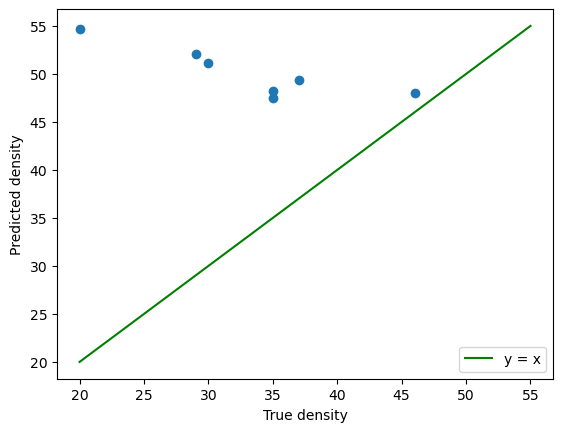

In [109]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([20, 55], [20, 55], color='green', label='y = x')
plt.legend()
plt.show()

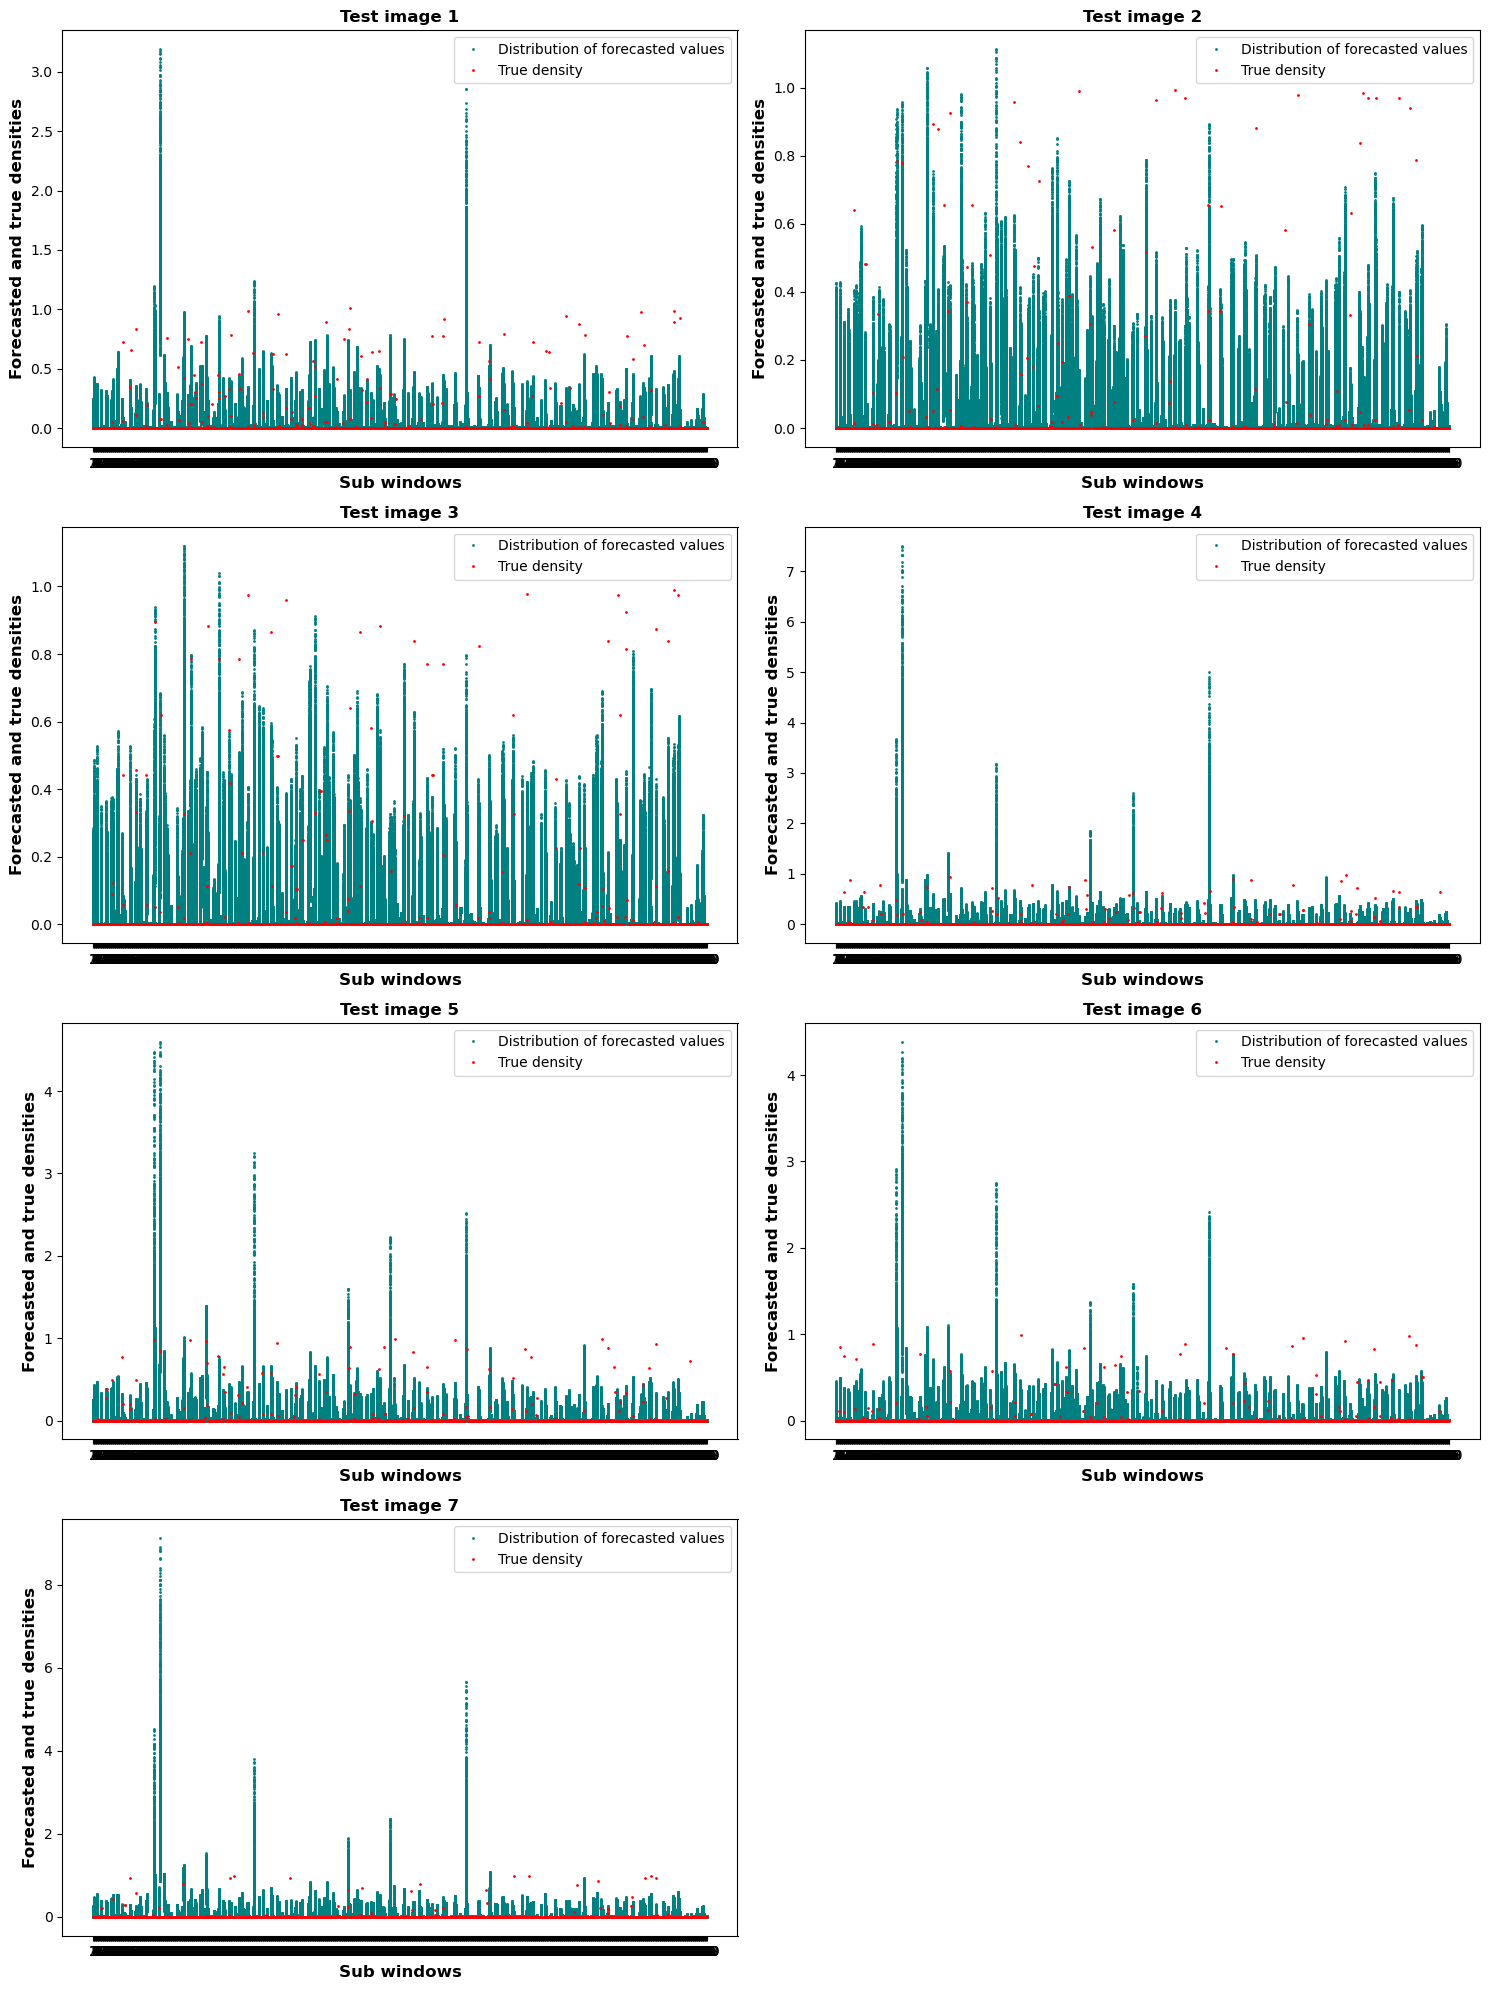

CPU times: user 26.3 s, sys: 859 ms, total: 27.1 s
Wall time: 26.8 s


In [106]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [107]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots